In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.metrics import explained_variance_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, PassiveAggressiveRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tabulate import tabulate
from tqdm import tqdm
from sklearn.neural_network import MLPRegressor

import tensorflow
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import explained_variance_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, PassiveAggressiveRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tabulate import tabulate
from tqdm import tqdm
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np
from tqdm import tqdm

from sklearn.linear_model import BayesianRidge, HuberRegressor, PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [4]:
data = pd.read_csv('/content/ETH_1H.csv',
                   parse_dates=['Date'],index_col=['Date'])

In [5]:
data.head(2)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299


In [6]:
data = data.sort_index()


In [7]:
data = data.drop(columns=['Unix Timestamp','Symbol'])


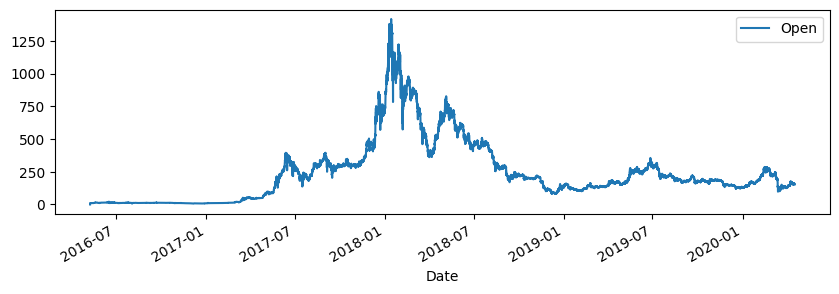

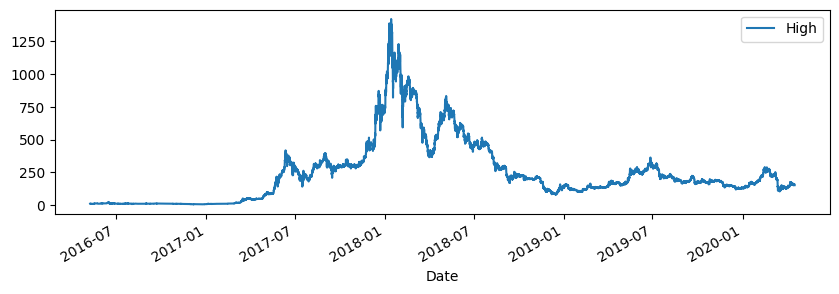

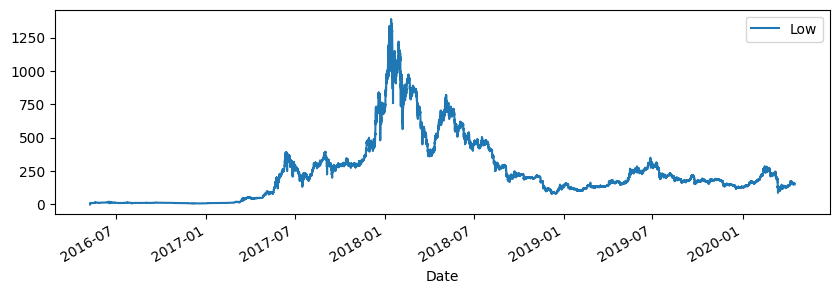

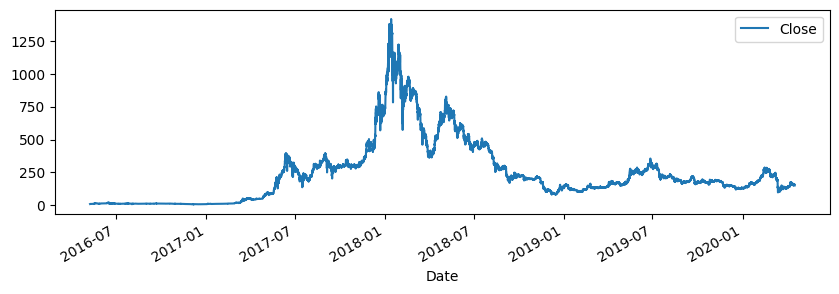

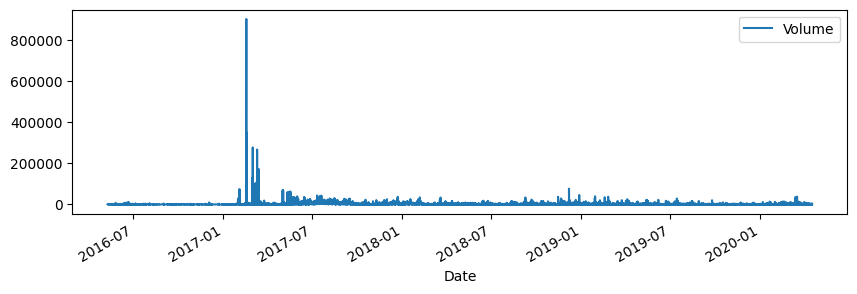

In [8]:
for i in data:
    plt.figure(figsize=(10,3))
    data[i].plot(legend=i)
    plt.show()

In [9]:
#creating the datatime features
def create_f(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week

    return df

In [10]:
df = create_f(data)


In [11]:
df.head()


,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
Date,,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


<Axes: >

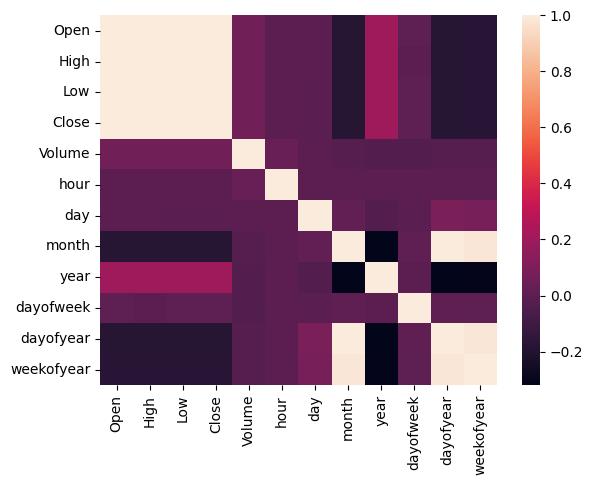

In [12]:
#correlation
sns.heatmap(df.corr())

In [13]:
#generating windows
# 24 hour window to predict 25th hour using only close

close = df.iloc[:,3]
windows=[]
target=[]
length = 240
for i in (range(len(close)-length)):
    x = close.iloc[i:i+length]
    y = close.iloc[i+length]
    windows.append(x)
    target.append(y)


windows=np.array(windows)
target=np.array(target).reshape(-1,1)



In [14]:
windows

array([[  9.55,  10.  ,   9.99, ...,  14.21,  13.99,  14.3 ],
       [ 10.  ,   9.99,   9.83, ...,  13.99,  14.3 ,  14.1 ],
       [  9.99,   9.83,   9.49, ...,  14.3 ,  14.1 ,  13.68],
       ...,
       [143.51, 143.04, 144.77, ..., 157.1 , 158.04, 157.18],
       [143.04, 144.77, 144.31, ..., 158.04, 157.18, 155.81],
       [144.77, 144.31, 143.91, ..., 157.18, 155.81, 152.94]])

In [15]:
#creating train and test data

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
windows_sc = sc.fit_transform(windows)
target_sc = sc.fit_transform(target)

windows_sc = windows_sc.reshape((len(windows_sc),length,1))

In [16]:
#splitting

split = int(0.8*len(windows_sc))

X_train = windows_sc[:split,:,:]
X_test = windows_sc[split:,:,:]
y_train = target_sc[:split,:]
y_test = target_sc[split:,:]

In [17]:
X_train


array([[[0.00244431],
        [0.00276314],
        [0.00275605],
        ...,
        [0.0057459 ],
        [0.00559004],
        [0.00580967]],

       [[0.00276314],
        [0.00275605],
        [0.00264269],
        ...,
        [0.00559004],
        [0.00580967],
        [0.00566797]],

       [[0.00275605],
        [0.00264269],
        [0.0024018 ],
        ...,
        [0.00580967],
        [0.00566797],
        [0.0053704 ]],

       ...,

       [[0.21780593],
        [0.21675027],
        [0.21812475],
        ...,
        [0.19822309],
        [0.19836479],
        [0.1973729 ]],

       [[0.21675027],
        [0.21812475],
        [0.2181035 ],
        ...,
        [0.19836479],
        [0.1973729 ],
        [0.1976988 ]],

       [[0.21812475],
        [0.2181035 ],
        [0.21660149],
        ...,
        [0.1973729 ],
        [0.1976988 ],
        [0.19701865]]])

In [21]:
# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        # ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    return r2, adj_r2, mse, mae, explained_var

# Initialize different regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=10000),
    'ElasticNet Regression': ElasticNet(max_iter=10000),
    'Random Forest Regressor': RandomForestRegressor(),
    # 'Gradient Boosting Regressor': GradientBoostingRegressor(),
    # 'AdaBoost Regressor': AdaBoostRegressor(),
    # 'Support Vector Regressor': SVR(),
    # 'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    # 'Decision Tree Regressor': DecisionTreeRegressor(),
    # 'Bayesian Ridge': BayesianRidge(),
    # 'Huber Regressor': HuberRegressor(),
    # 'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    # 'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000),
    # 'Extra Trees Regressor': ExtraTreesRegressor(),
    # 'Bagging Regressor': BaggingRegressor(),
    # 'XGBoost Regressor': XGBRegressor(),
    # 'LightGBM Regressor': LGBMRegressor(),
}

y_train = y_train.ravel()
y_test = y_test.ravel()

# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae, explained_var = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae, explained_var])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error", "Explained Variance"]
print(tabulate(results, headers, tablefmt="grid"))

100%|██████████| 5/5 [15:29<00:00, 185.91s/it]

+-------------------------+-------------+----------------------+----------------------+-----------------------+----------------------+
| Model                   |   R-squared |   Adjusted R-squared |   Mean Squared Error |   Mean Absolute Error |   Explained Variance |
+=========================+=============+======================+======================+=======================+======================+
| Linear Regression       |    0.997798 |             0.997718 |          1.82289e-06 |           0.0008143   |             0.997799 |
+-------------------------+-------------+----------------------+----------------------+-----------------------+----------------------+
| Ridge Regression        |    0.997024 |             0.996916 |          2.46384e-06 |           0.000945917 |             0.99703  |
+-------------------------+-------------+----------------------+----------------------+-----------------------+----------------------+
| Lasso Regression        |   -3.18438  |            -3

In [18]:
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten to (n_samples, n_features)
X_test = X_test.reshape(X_test.shape[0], -1)  # Flatten to (n_samples, n_features)


In [19]:
X_train

array([[0.00244431, 0.00276314, 0.00275605, ..., 0.0057459 , 0.00559004,
        0.00580967],
       [0.00276314, 0.00275605, 0.00264269, ..., 0.00559004, 0.00580967,
        0.00566797],
       [0.00275605, 0.00264269, 0.0024018 , ..., 0.00580967, 0.00566797,
        0.0053704 ],
       ...,
       [0.21780593, 0.21675027, 0.21812475, ..., 0.19822309, 0.19836479,
        0.1973729 ],
       [0.21675027, 0.21812475, 0.2181035 , ..., 0.19836479, 0.1973729 ,
        0.1976988 ],
       [0.21812475, 0.2181035 , 0.21660149, ..., 0.1973729 , 0.1976988 ,
        0.19701865]])

100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


+-------------------+-------------+----------------------+----------------------+-----------------------+----------------------+
| Model             |   R-squared |   Adjusted R-squared |   Mean Squared Error |   Mean Absolute Error |   Explained Variance |
+===================+=============+======================+======================+=======================+======================+
| Linear Regression |    0.997798 |             0.997718 |          1.82289e-06 |             0.0008143 |             0.997799 |
+-------------------+-------------+----------------------+----------------------+-----------------------+----------------------+


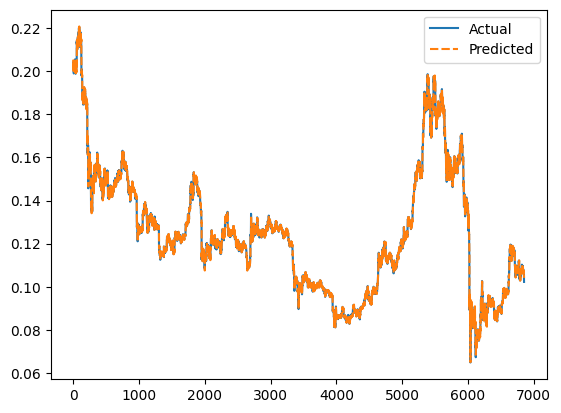

In [33]:

# Assuming X_train, X_test, y_train, and y_test are defined earlier

# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        # ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    diff = pd.DataFrame(
{
    'Actual':y_test,
    'Predicted':y_pred
})

    sns.lineplot(data= diff)

    return r2, adj_r2, mse, mae, explained_var

# Initialize different regression models
regression_models = {

    'Linear Regression': LinearRegression(),


}

# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae, explained_var = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae, explained_var])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error", "Explained Variance"]
print(tabulate(results, headers, tablefmt="grid"))

# Model building and training


In [28]:
X_train.shape

(27405, 240)

In [30]:
# Reshape the data to be 3D as required by LSTM: (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Now, create the model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=5, batch_size=2000, validation_split=0.25)


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0332 - val_loss: 7.9412e-04
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0062 - val_loss: 1.0825e-04
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0036 - val_loss: 1.8343e-04
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0025 - val_loss: 2.1779e-04
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0019 - val_loss: 2.0132e-04


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100)                 │         136,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,505 (1.56 MB)

 Trainable params: 136,501 (533.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 273,004 (1.04 MB)

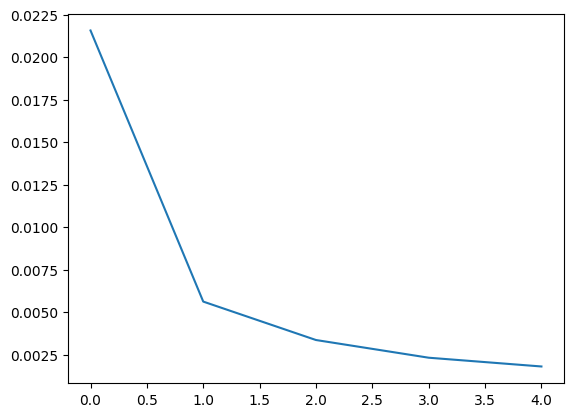

In [32]:
plt.plot(model.history.history['loss'])
